# Frequency analysis
##  Extracting the most common words

Query: Propose a code snippet in Python to perform frequency analysis on a data frame column "review_comment_message". The reviews are in Portuguese.

Output: At first this query produced a code snippet not fully adapted to Portuguese language. The user had to ask ChatGPT for correction. The second version of the code works correctly.

In [ ]:
# The code proposed by ChatGPT to perform basic frequency analysis on customer reviews - second version.
#
# Manually introduced modifications:
# 1. A line to remove empty records from a dataframe was added.

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Make sure to download Portuguese stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Load your DataFrame (adapted)
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

# Preprocessing function
def preprocess_text(text):
    # Tokenize, convert to lowercase, and remove punctuation
    tokens = word_tokenize(text.lower(), language='portuguese')
    words = [word for word in tokens if word.isalpha()]

    # Remove Portuguese stopwords
    stop_words = set(stopwords.words('portuguese'))
    filtered_words = [word for word in words if word not in stop_words]

    return filtered_words

# Apply preprocessing to the 'review_comment_message' column
df['processed_review'] = df['review_comment_message'].apply(preprocess_text)

# Calculate word frequencies
word_freq = Counter()
for _, row in df.iterrows():
    word_freq.update(row['processed_review'])

# Print the most common words and their frequencies
print(word_freq.most_common(10))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('produto', 18344), ('prazo', 8410), ('entrega', 6486), ('antes', 5619), ('chegou', 5535), ('recebi', 5262), ('bom', 4592), ('recomendo', 4269), ('entregue', 3769), ('veio', 3276)]


##  Extracting the most common phrases
### Let's ask ChatGPT
Query: Propose code snippet to analyse trigrams in my reviews.

Output: The code works correctly.

In [ ]:
# The code proposed by ChatGPT to perform basic frequency analysis on customer reviews.
#
# Manually introduced modifications:
# 1. A line to remove empty records from a dataframe was added.

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from collections import Counter

# Make sure to download Portuguese stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Load your DataFrame (adapted)
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

# Preprocessing function
def preprocess_text(text):
    # Tokenize, convert to lowercase, and remove punctuation
    tokens = word_tokenize(text.lower(), language='portuguese')
    words = [word for word in tokens if word.isalpha()]

    # Remove Portuguese stopwords
    stop_words = set(stopwords.words('portuguese'))
    filtered_words = [word for word in words if word not in stop_words]

    return filtered_words

# Apply preprocessing to the 'review_comment_message' column
df['processed_review'] = df['review_comment_message'].apply(preprocess_text)

# Calculate trigram frequencies
trigram_measures = TrigramAssocMeasures()
trigram_freq = Counter()

for _, row in df.iterrows():
    finder = TrigramCollocationFinder.from_words(row['processed_review'])
    trigram_freq.update(finder.ngram_fd)

# Print the most common trigrams and their frequencies
print(trigram_freq.most_common(10))

#  Co-occurrence analysis
##  Generating code for co-occurrence analysis
Query: Propose a code snippet in Python to perform co-occurence analysis for customer reviews in Portuguese stored as a column "review_comment_message" in a pandas dataframe.

Output: The code works well but is rather slow taking into account the size of our input dataset. To test it, the input was limited to the first 500 non-empty reviews.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


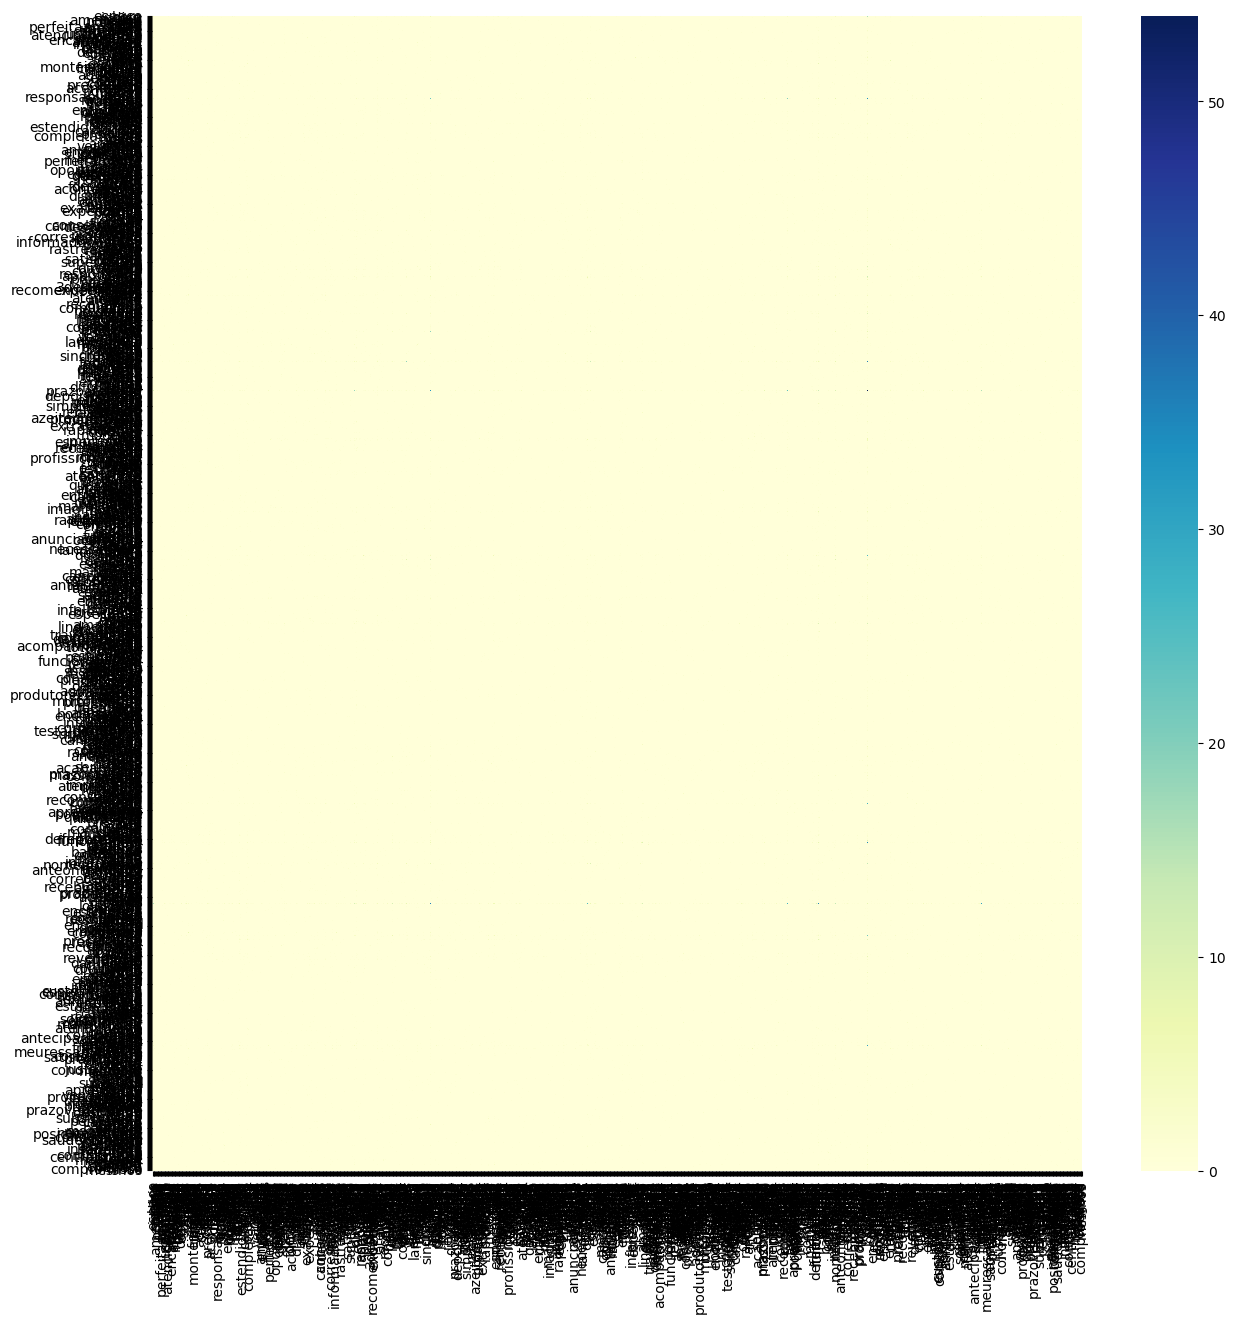

In [ ]:
# The code proposed by ChatGPT to perform co-occurrence analysis on customer reviews.
#
# Manually introduced modifications:
# 1. A line to remove empty records from a dataframe was added.import pandas as pd.
# 2. The analysis was limited to the first 500 lines of data.

import numpy as np
import re
from nltk.corpus import stopwords
from collections import Counter
from itertools import combinations
from nltk import download
import seaborn as sns
import matplotlib.pyplot as plt

# Download the Portuguese stopwords
download('stopwords')

# Load your dataset (adapted)
data = pd.read_csv('olist_order_reviews_dataset.csv')
data = data.dropna(subset = ['review_comment_message'])
data = data.head(500)

# Preprocessing function
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text).lower()
    words = text.split()
    words = [word for word in words if word not in stopwords.words('portuguese')]
    return words

# Co-occurrence function
def co_occurrence_matrix(corpus, window_size=5):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
    n = len(vocab)
    co_occurrence_matrix = np.zeros((n, n))

    for row in data['review_comment_message']:
        tokens = preprocess(row)
        for i, word in enumerate(tokens):
            for j in range(max(i - window_size, 0), min(i + window_size + 1, len(tokens))):
                if i != j:
                    co_occurrence_matrix[vocab_index[word], vocab_index[tokens[j]]] += 1

    return co_occurrence_matrix, vocab_index

# Calculate co-occurrence matrix
corpus = [word for row in data['review_comment_message'] for word in preprocess(row)]
co_matrix, vocab_index = co_occurrence_matrix(corpus)

# Visualize the co-occurrence matrix using a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(co_matrix, xticklabels=vocab_index.keys(), yticklabels=vocab_index.keys(), cmap="YlGnBu")
plt.show()

### Let's ask ChatGPT
Query: This code is running and running. Is it normal?

Output: The provided code has a couple of improvements to optimize the performance. It works well. The analysis was limited to 30 most popular words.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


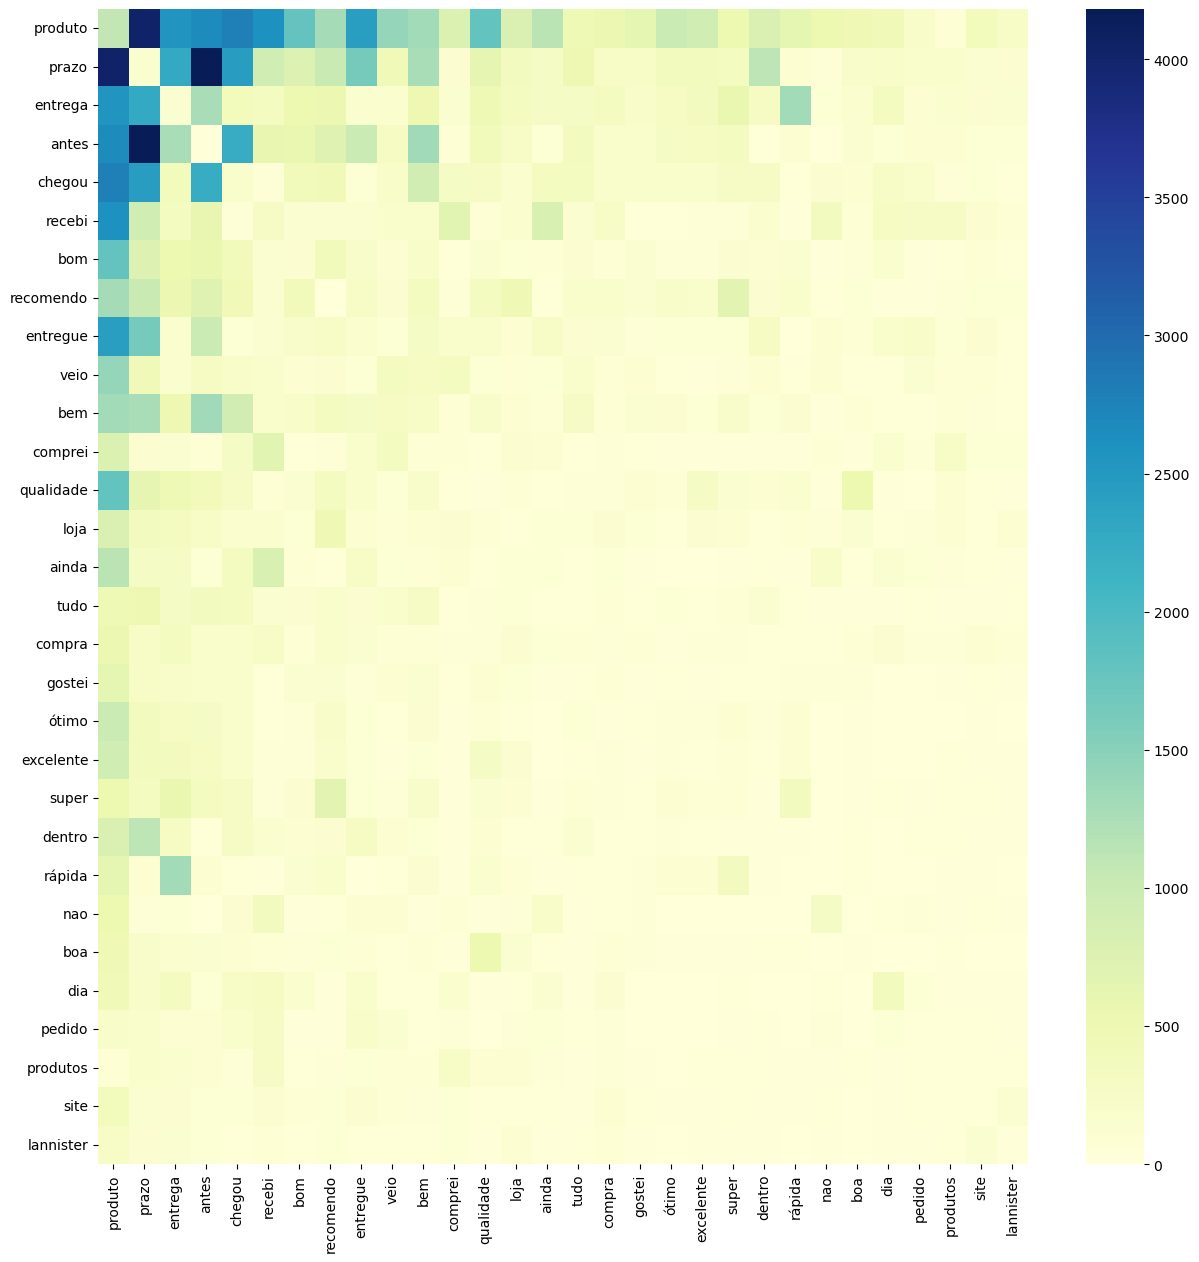

In [ ]:
# The code proposed by ChatGPT to perform optimized co-occurrence analysis on customer reviews.
#
# Manually introduced modifications:
# 1. A line to remove empty records from a dataframe was added.import pandas as pd.

import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from collections import Counter
from itertools import combinations
from nltk import download
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix

# Download the Portuguese stopwords
download('stopwords')
stopwords_set = set(stopwords.words('portuguese'))

# Load your dataset (adapted)
data = pd.read_csv('olist_order_reviews_dataset.csv')
data = data.dropna(subset = ['review_comment_message'])

# Preprocessing function
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text).lower()
    words = text.split()
    words = [word for word in words if word not in stopwords_set]
    return words

# Co-occurrence function
def co_occurrence_matrix(corpus, vocab, window_size=5):
    vocab_index = {word: i for i, word in enumerate(vocab)}
    n = len(vocab)
    co_occurrence_matrix = lil_matrix((n, n), dtype=np.float64)

    for row in data['review_comment_message']:
        tokens = preprocess(row)
        for i, word in enumerate(tokens):
            for j in range(max(i - window_size, 0), min(i + window_size + 1, len(tokens))):
                if i != j and word in vocab_index and tokens[j] in vocab_index:
                    co_occurrence_matrix[vocab_index[word], vocab_index[tokens[j]]] += 1

    return co_occurrence_matrix, vocab_index

# Calculate co-occurrence matrix
corpus = [word for row in data['review_comment_message'] for word in preprocess(row)]
word_counts = Counter(corpus)
top_n_words = 30  # Adjust this number according to your needs
most_common_words = [word for word, count in word_counts.most_common(top_n_words)]
co_matrix, vocab_index = co_occurrence_matrix(corpus, most_common_words)

# Visualize the co-occurrence matrix using a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(co_matrix.toarray(), xticklabels=vocab_index.keys(), yticklabels=vocab_index.keys(), cmap="YlGnBu")
plt.show()

### Let's ask ChatGPT
Query: Can you modify the last code for preparing the co-occurrence matrix, so that the axes in visualization also have the English translation of the 30 most common words?

Output: The provided code is identical to the one in Listing 5.26. The only difference is the English translation of 30 most common words from the reviews and adaptation of the visualization part. The analysis was limited to 30 most popular words.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


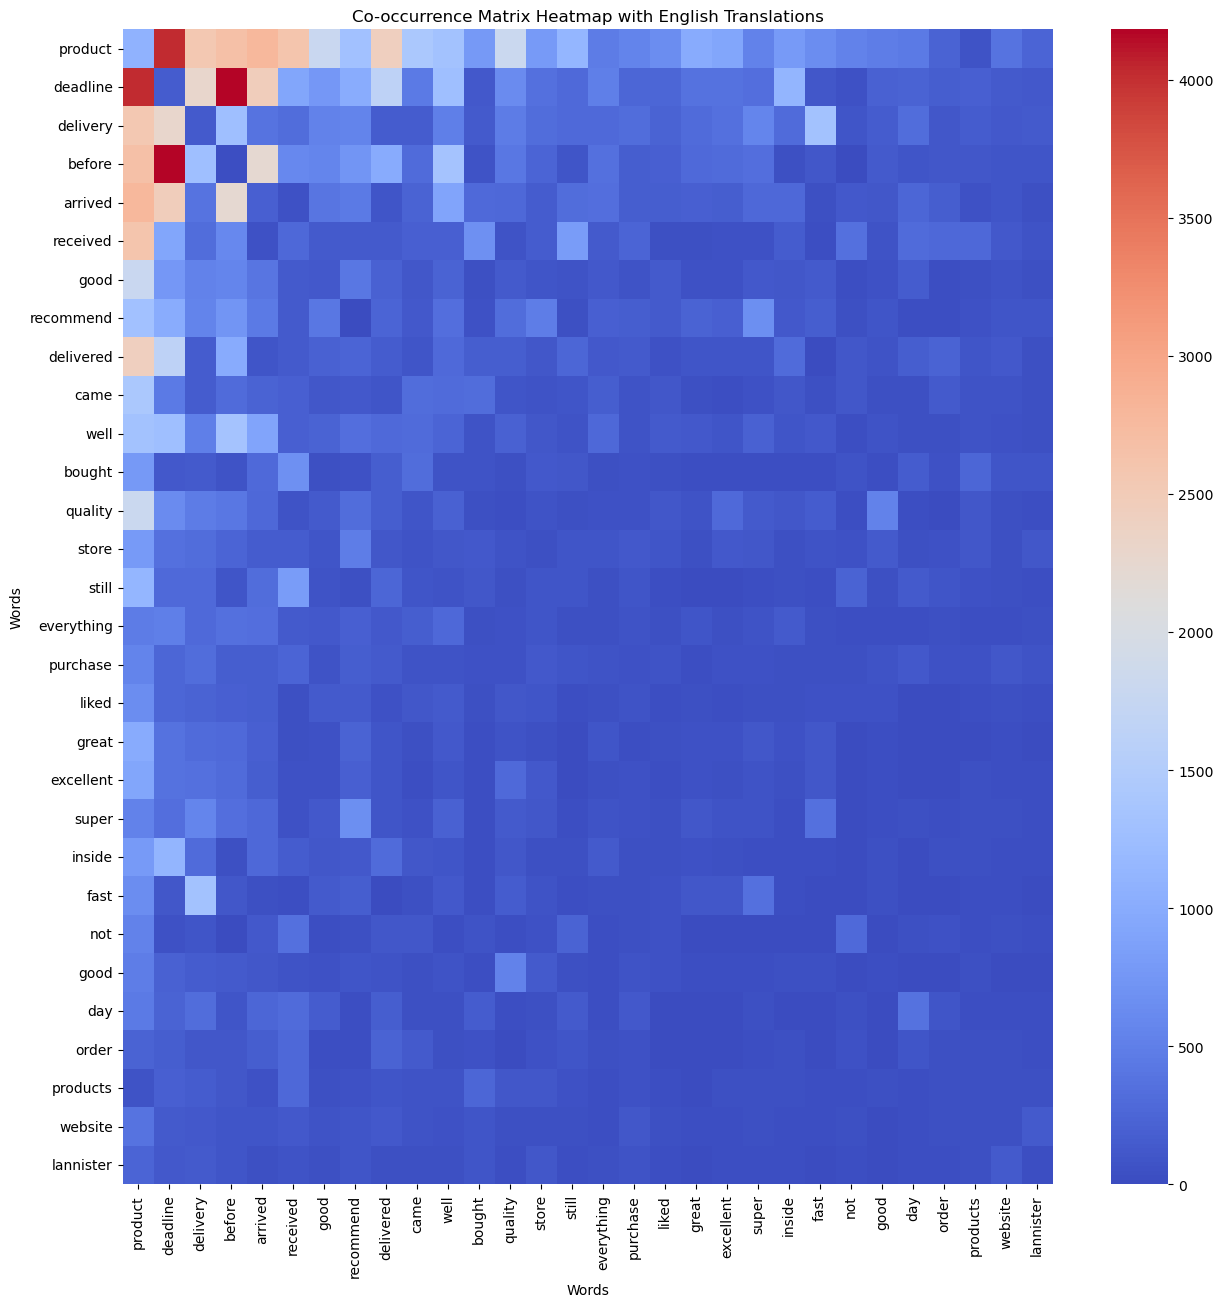

In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from collections import Counter
from itertools import combinations
from nltk import download
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix


# Download the Portuguese stopwords
download('stopwords')
stopwords_set = set(stopwords.words('portuguese'))

# Load your dataset (adapted)
data = pd.read_csv('olist_order_reviews_dataset.csv')
data = data.dropna(subset = ['review_comment_message'])

# Preprocessing function
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text).lower()
    words = text.split()
    words = [word for word in words if word not in stopwords_set]
    return words


# Co-occurrence function
def co_occurrence_matrix(corpus, vocab, window_size=5):
    vocab_index = {word: i for i, word in enumerate(vocab)}
    n = len(vocab)
    co_occurrence_matrix = lil_matrix((n, n), dtype=np.float64)

    for row in data['review_comment_message']:
        tokens = preprocess(row)
        for i, word in enumerate(tokens):
            for j in range(max(i - window_size, 0), min(i + window_size + 1, len(tokens))):
                if i != j and word in vocab_index and tokens[j] in vocab_index:
                    co_occurrence_matrix[vocab_index[word], vocab_index[tokens[j]]] += 1

    return co_occurrence_matrix, vocab_index

# Calculate co-occurrence matrix
corpus = [word for row in data['review_comment_message'] for word in preprocess(row)]
word_counts = Counter(corpus)
top_n_words = 30  # Adjust this number according to your needs
most_common_words = [word for word, count in word_counts.most_common(top_n_words)]
co_matrix, vocab_index = co_occurrence_matrix(corpus, most_common_words)

# English translations of the words (this part was added by ChatGPT when we asked directly for translations)
translations = {
    'produto': 'product',
    'prazo': 'deadline',
    'entrega': 'delivery',
    'antes': 'before',
    'chegou': 'arrived',
    'recebi': 'received',
    'bom': 'good',
    'recomendo': 'recommend',
    'entregue': 'delivered',
    'veio': 'came',
    'bem': 'well',
    'comprei': 'bought',
    'qualidade': 'quality',
    'loja': 'store',
    'ainda': 'still',
    'tudo': 'everything',
    'compra': 'purchase',
    'gostei': 'liked',
    'ótimo': 'great',
    'excelente': 'excellent',
    'super': 'super',
    'dentro': 'inside',
    'rápida': 'fast',
    'nao': 'not',
    'boa': 'good',
    'dia': 'day',
    'pedido': 'order',
    'produtos': 'products',
    'site': 'website',
    'lannister': 'lannister'
}

# Create a list of translated words for visualization
translated_words = [translations.get(word, word) for word in vocab_index.keys()]

# Visualize the co-occurrence matrix using a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(co_matrix.toarray(), xticklabels=translated_words, yticklabels=translated_words, cmap='coolwarm', annot=False)
plt.title("Co-occurrence Matrix Heatmap with English Translations")
plt.xlabel("Words")
plt.ylabel("Words")
plt.show()

#  Keyword Search
## Generating keywords


In [ ]:
# Code partly proposed by ChatGPT. It calls ChatGPT API to generate a list of keywords. In order to use it you must provide your own API key.

import openai

# Replace 'your_openai_api_key' with your actual OpenAI API key
openai.api_key = 'your_openai_api_key'

prompt = "Generate a list of 20 keywords indicating positive sentiment to be used for searching customer reviews in Portuguese."
response = openai.Completion.create(
    engine="text-davinci-002",
    prompt=prompt,
    max_tokens=100,
    n=1,
    stop=None,
    temperature=0.7,
)

# Output formatting proposed by ChatGPT - incorrect
keywords = response.choices[0].text.strip().split(', ')

# Correct output formatting added manually. The output formatting must be adapted manually with each run as ChatGPT API does not return repetitive results.
keywords = response.choices[0].text.strip().split('\n')

# Printing the output. The number and type of generated keywords may vary with each run.
print(len(keywords))
print(keywords)

AuthenticationError: Incorrect API key provided: your_ope*******_key. You can find your API key at https://platform.openai.com/account/api-keys.

## 5.4.2 Searching for keywords
### Listing 5.2

Manually modified code generated by ChatGPT with query:
"Use these keywords to search a column of a pandas data frame for positive customer reviews."

Output: Most of the code was proposed by ChatGPT. It works well after the correction for missing reviews. The correction was also proposed by ChatGPT.

In [ ]:
# Importing libraries and data.
import pandas as pd

df = pd.read_csv(csv_file_path)

# List of keywords proposed by ChatGPT.
keywords = [
    "excelente", "ótimo", "maravilhoso", "incrível", "fantástico",
    "perfeito", "bom", "eficiente", "durável", "confiável",
    "rápido", "custo-benefício", "recomendo", "satisfeito",
    "surpreendente", "confortável", "fácil de usar", "funcional",
    "melhor", "vale a pena"
]

# Second version of the keyword search function proposed by ChatGPT that copes with NaNs in the input.
def is_positive(review, keywords):
    if not isinstance(review, str):
        return False

    for keyword in keywords:
        if keyword.lower() in review.lower():
            return True
    return False

# Applying the function to the test DataFrame (adapted).
df['positive_review'] = df['review_comment_message'].apply(lambda x: is_positive(x, keywords))

### Listing 5.3
Human generated code to assess sensitivity and specificy of the positive review search.

In [ ]:
# Remove rows that don't have reviews.
df = df.dropna(subset = ['review_comment_message'])

# Extract records with positive reviews assessed by keywords and by review scores.
posrev_keyword = df[df['positive_review']==True]
posrev_score = df[(df["review_score"]==5)|(df["review_score"]==4)]

# Perform set operations to determine true positives (TP), false positives (FP), false negatives (FN) and true negatives (TN).
TP = pd.merge(posrev_keyword, posrev_score)
FP = posrev_keyword[posrev_keyword["review_id"].isin(posrev_score["review_id"]) == False]
FN = posrev_score[posrev_score["review_id"].isin(posrev_keyword["review_id"]) == False]
TN = df[(df["review_id"].isin(posrev_keyword["review_id"]) == False) & (df["review_id"].isin(posrev_score["review_id"]) == False)]

# Calculate sensitivity and specificity
print("Sensitivity: ", round(len(TP) / (len(TP) + len(FN)),2))
print("Specificity: ", round(len(TN) / (len(TN) + len(FP)),2))

Sensitivity:  0.47
Specificity:  0.89


## 5.4.3 Improving keyword search
### Let's ask ChatGTP 5.17

Query: Can you apply steps 1,3 and 5 in a single text cleaning function?

The code generated by ChatGTP was adapted manually by adding comments and removing records that do not contain a review. A section to assess sensitivity and specificity of the positive review search was added manually.

The code works well but the sensitivity of search is very poor due to the fact that ChatGTP didn't propose to stem the keywords as well.

In [ ]:
# Importing libraries and data.
import pandas as pd
import string
import nltk
from nltk.stem import RSLPStemmer

nltk.download('rslp')
stemmer = RSLPStemmer()

# Functions
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

def remove_extra_whitespace(text):
    return ' '.join(text.split())

def stem_words(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = remove_punctuation(text)
    text = remove_extra_whitespace(text)
    text = stem_words(text)
    return text

# Second version of the keyword search function proposed by ChatGPT that copes with NaNs in the input.
def is_positive(review, keywords):
    if not isinstance(review, str):
        return False

    for keyword in keywords:
        if keyword.lower() in review.lower():
            return True
    return False

# Reading data and getting rid of NaNs (adapted manually).
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

# List of keywords proposed by ChatGPT.
keywords = [
    "excelente", "ótimo", "maravilhoso", "incrível", "fantástico",
    "perfeito", "bom", "eficiente", "durável", "confiável",
    "rápido", "custo-benefício", "recomendo", "satisfeito",
    "surpreendente", "confortável", "fácil de usar", "funcional",
    "melhor", "vale a pena"
]

# Applying the function to the test DataFrame. Variable names were adapted.
df['cleaned_review_comment_message'] = df['review_comment_message'].apply(clean_text)
df['positive_review'] = df['cleaned_review_comment_message'].apply(lambda x: is_positive(x, keywords))

# Assesing keyword search accuracy (added manually).

# Extract records with positive reviews assessed by keywords and by review scores.
posrev_keyword = df[df['positive_review']==True]
posrev_score = df[(df["review_score"]==5)|(df["review_score"]==4)]

# Perform set operations to determine true positives (TP), false positives (FP), false negatives (FN) and true negatives (TN).
TP = pd.merge(posrev_keyword, posrev_score)
FP = posrev_keyword[posrev_keyword["review_id"].isin(posrev_score["review_id"]) == False]
FN = posrev_score[posrev_score["review_id"].isin(posrev_keyword["review_id"]) == False]
TN = df[(df["review_id"].isin(posrev_keyword["review_id"]) == False) & (df["review_id"].isin(posrev_score["review_id"]) == False)]

# Calculate sensitivity and specificity
print("Sensitivity: ", round(len(TP) / (len(TP) + len(FN)),2))
print("Specificity: ", round(len(TN) / (len(TN) + len(FP)),2))

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\marle\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


Sensitivity:  0.17
Specificity:  0.94


### Let's ask ChatGTP 5.18
Query: After applying the proposed cleaning to the reviews and performing the keyword search as described previously the sensitivity of the positive review search dropped drastically. Why?

The code generated by ChatGTP was adapted manually by adding comments and removing records that do not contain a review. A section to assess sensitivity and specificity of the positive review search was added manually.

The first code snippet applies the clean_text function also to the list of keywords. The second code snippet uses lemmatization instead of stemming.

Both solutions were provided by ChatGPT.

In [ ]:
# 1st code snippet.
# Code with stemmed keywords.

# Importing libraries and data.
import pandas as pd
import string
import nltk
from nltk.stem import RSLPStemmer

nltk.download('rslp')
stemmer = RSLPStemmer()

# Functions
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

def remove_extra_whitespace(text):
    return ' '.join(text.split())

def stem_words(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = remove_punctuation(text)
    text = remove_extra_whitespace(text)
    text = stem_words(text)
    return text

# Second version of the keyword search function proposed by ChatGPT that copes with NaNs in the input.
def is_positive(review, keywords):
    if not isinstance(review, str):
        return False

    for keyword in keywords:
        if keyword.lower() in review.lower():
            return True
    return False

# Reading data and getting rid of NaNs (adapted).
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

# List of keywords proposed by ChatGPT. Keywords are also stemmed.
keywords = [
    "excelente", "ótimo", "maravilhoso", "incrível", "fantástico",
    "perfeito", "bom", "eficiente", "durável", "confiável",
    "rápido", "custo-benefício", "recomendo", "satisfeito",
    "surpreendente", "confortável", "fácil de usar", "funcional",
    "melhor", "vale a pena"
]
new_keywords = [clean_text(x) for x in keywords]

# Applying the function to the test DataFrame. Variable names were adapted.
df['cleaned_review_comment_message'] = df['review_comment_message'].apply(clean_text)
df['positive_review'] = df['cleaned_review_comment_message'].apply(lambda x: is_positive(x, new_keywords))

# Keyword search accuracy

# Extract records with positive reviews assessed by keywords and by review scores.
posrev_keyword = df[df['positive_review']==True]
posrev_score = df[(df["review_score"]==5)|(df["review_score"]==4)]

# Perform set operations to determine true positives (TP), false positives (FP), false negatives (FN) and true negatives (TN).
TP = pd.merge(posrev_keyword, posrev_score)
FP = posrev_keyword[posrev_keyword["review_id"].isin(posrev_score["review_id"]) == False]
FN = posrev_score[posrev_score["review_id"].isin(posrev_keyword["review_id"]) == False]
TN = df[(df["review_id"].isin(posrev_keyword["review_id"]) == False) & (df["review_id"].isin(posrev_score["review_id"]) == False)]

# Calculate sensitivity and specificity
print("Sensitivity: ", round(len(TP) / (len(TP) + len(FN)),2))
print("Specificity: ", round(len(TN) / (len(TN) + len(FP)),2))

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\marle\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


Sensitivity:  0.56
Specificity:  0.83


In [ ]:
# 2nd code snippet
# Code with review lemmatization instead of stemming.

# Importing libraries and data.
import pandas as pd
import string
import spacy

nlp = spacy.load("pt_core_news_sm")

# Functions
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

def remove_extra_whitespace(text):
    return ' '.join(text.split())

def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_words)

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = remove_punctuation(text)
    text = remove_extra_whitespace(text)
    text = lemmatize_text(text)
    return text

# Second version of the keyword search function proposed by ChatGPT that copes with NaNs in the input.
def is_positive(review, keywords):
    if not isinstance(review, str):
        return False

    for keyword in keywords:
        if keyword.lower() in review.lower():
            return True
    return False

# Reading data and getting rid of NaNs (adapted).
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

# List of keywords proposed by ChatGPT. Keywords are also stemmed.
keywords = [
    "excelente", "ótimo", "maravilhoso", "incrível", "fantástico",
    "perfeito", "bom", "eficiente", "durável", "confiável",
    "rápido", "custo-benefício", "recomendo", "satisfeito",
    "surpreendente", "confortável", "fácil de usar", "funcional",
    "melhor", "vale a pena"
]
keywords = [clean_text(x) for x in keywords]

# Applying the function to the test DataFrame. Variable names were adapted.
df['cleaned_review_comment_message'] = df['review_comment_message'].apply(clean_text)
df['positive_review'] = df['cleaned_review_comment_message'].apply(lambda x: is_positive(x, keywords))

# Keyword search accuracy

# Extract records with positive reviews assessed by keywords and by review scores.
posrev_keyword = df[df['positive_review']==True]
posrev_score = df[(df["review_score"]==5)|(df["review_score"]==4)]

# Perform set operations to determine true positives (TP), false positives (FP), false negatives (FN) and true negatives (TN).
TP = pd.merge(posrev_keyword, posrev_score)
FP = posrev_keyword[posrev_keyword["review_id"].isin(posrev_score["review_id"]) == False]
FN = posrev_score[posrev_score["review_id"].isin(posrev_keyword["review_id"]) == False]
TN = df[(df["review_id"].isin(posrev_keyword["review_id"]) == False) & (df["review_id"].isin(posrev_score["review_id"]) == False)]

# Calculate sensitivity and specificity
print("Sensitivity: ", round(len(TP) / (len(TP) + len(FN)),2))
print("Specificity: ", round(len(TN) / (len(TN) + len(FP)),2))

Sensitivity:  0.5
Specificity:  0.89


## 5.4.4 Keyword search for simple sentiment analysis
### Let's ask ChatGPT 5.19

Query: I have a dataframe with a column "review_comment_message" that contains customer reviews. I want to extract positive reviews using keyword search. The reviews are in Portuguese. Propose a python code that can do it.

Output: The keyword search was entirely proposed by ChatGPT, yet it is pretty basic. Records with empty reviews were removed manually.

In [ ]:
import pandas as pd

# Load your dataframe - adapted manually
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

# List of positive keywords in Portuguese
positive_keywords = ['ótimo', 'excelente', 'bom', 'incrível', 'maravilhoso', 'perfeito', 'gostei', 'satisfeito', 'recomendo', 'amei']

# Define a function to check if a review contains positive keywords
def is_positive(review):
    for keyword in positive_keywords:
        if keyword.lower() in review.lower():
            return True
    return False

# Apply the function to the 'review_comment_message' column
df['is_positive'] = df['review_comment_message'].apply(is_positive)

# Create a new dataframe with only positive reviews
positive_reviews_df = df[df['is_positive']]

# Save the positive reviews to a new CSV file
positive_reviews_df.to_csv('positive_reviews.csv', index=False)


### Let's ask ChatGPT 5.20

Query: There is another column in the dataframe that contains the product score, a number from 1 to 5. How can I use this column to assess sensitivity and specificity of positive review extraction with help of keywords?

Output: In the ChatGTP generated code the correctness of positive reviews' extraction was assessed by sensitivy/specificity score.

In [ ]:
import pandas as pd

# Assuming you have already loaded the dataframe and defined the is_positive function
# Define a function to determine if a review is positive based on the product score
def is_positive_based_on_score(score, threshold=4):
    return score >= threshold

# Apply the function to the 'product_score' column
df['is_positive_based_on_score'] = df['review_score'].apply(is_positive_based_on_score)

# Calculate the confusion matrix
TP = sum((df['is_positive'] == True) & (df['is_positive_based_on_score'] == True))
FP = sum((df['is_positive'] == True) & (df['is_positive_based_on_score'] == False))
TN = sum((df['is_positive'] == False) & (df['is_positive_based_on_score'] == False))
FN = sum((df['is_positive'] == False) & (df['is_positive_based_on_score'] == True))

# Calculate sensitivity (true positive rate) and specificity (true negative rate)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')


Sensitivity: 0.48
Specificity: 0.88


### Let's ask ChatGPT 5.21

Query: There is another column in the dataframe that contains the product score, a number from 1 to 5. How can I use this column to see if my positive review extraction is correct?

Output: The proposed solution to assess extraction correctness is fine, nevertheless, the sensitivity/specificity approach is likely to provide more information. Empty records were removed manually.

In [ ]:
import pandas as pd

# Load your dataframe (adapted)
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

# List of positive keywords in Portuguese
positive_keywords = ['ótimo', 'excelente', 'bom', 'incrível', 'maravilhoso', 'perfeito', 'gostei', 'satisfeito', 'recomendo', 'amei']

# Define a function to check if a review contains positive keywords
def is_positive(review):
    for keyword in positive_keywords:
        if keyword.lower() in review.lower():
            return True
    return False

# Apply the function to the 'review_comment_message' column
df['is_positive'] = df['review_comment_message'].apply(is_positive)

# Create a new dataframe with only positive reviews
positive_reviews_df = df[df['is_positive']]

# Calculate the average product score in the original dataframe
original_avg_score = df['review_score'].mean()
print(f"Original average product score: {original_avg_score}")

# Calculate the average product score in the positive reviews dataframe
positive_avg_score = positive_reviews_df['review_score'].mean()
print(f"Positive average product score: {positive_avg_score}")

# Compare the average scores
if positive_avg_score > original_avg_score:
    print("The average product score for positive reviews is higher than the original dataset. The extraction seems to be working correctly.")
else:
    print("The average product score for positive reviews is not higher than the original dataset. The extraction might not be accurate.")

# Save the positive reviews to a new CSV file
# positive_reviews_df.to_csv('positive_reviews.csv', index=False)

Original average product score: 3.66986358200942
Positive average product score: 4.500103455410718
The average product score for positive reviews is higher than the original dataset. The extraction seems to be working correctly.


### Let's ask ChatGPT 5.22

Query: There is another column in the dataframe "review_score" that contains the product score, a number from 1 to 5. How can I use this column to see if my positive review extraction is correct?

Output: Almost identical query made ChatGPT generate a completely different approach to the problem. This approach is problematic - see Chapter 5 for more information. Empty records were removed manually.

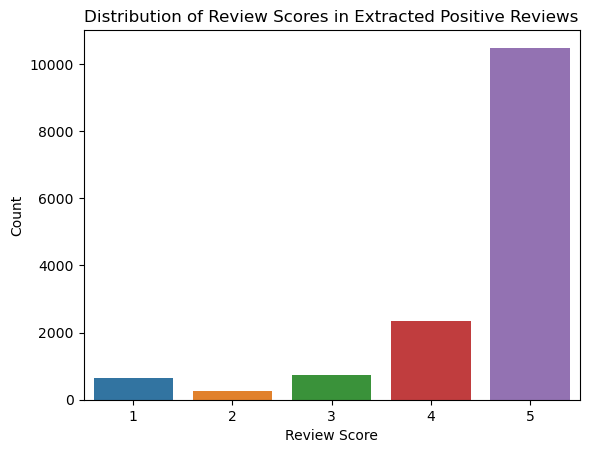

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataframe (adapted).
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

# List of positive keywords in Portuguese
positive_keywords = ['ótimo', 'excelente', 'bom', 'incrível', 'maravilhoso', 'perfeito', 'gostei', 'satisfeito', 'recomendo', 'amei']

# Define a function to check if a review contains positive keywords
def is_positive(review):
    for keyword in positive_keywords:
        if keyword.lower() in review.lower():
            return True
    return False

# Apply the function to the 'review_comment_message' column
df['is_positive'] = df['review_comment_message'].apply(is_positive)

# Create a new dataframe with only positive reviews
positive_reviews_df = df[df['is_positive']]

# Visualize the distribution of review scores in the positive reviews dataframe
sns.countplot(x='review_score', data=positive_reviews_df)
plt.title('Distribution of Review Scores in Extracted Positive Reviews')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

# 5.5 Dictionary-based methods
## 5.5.3 Adapting the code to new resources
### Listing 5.4

In [ ]:
# Code snippet to load the new sentiment lexicon written by ChatGPT and modyfied by a human.
# Make sure that you have the correct lexicon downloaded and stored in your working folder.
# The lexicon was downloaded in April 2023 from:
# https://b2share.eudat.eu/records/93ab120efdaa4662baec6adee8e7585f

with open('SentiLex-lem-PT02.txt', 'r', encoding='utf8') as f:
    lines = f.read().splitlines()
lines = [re.split(';|\.', line) for line in lines]

# We only keep the records which have one polarization annotation.
lines = [line for line in lines if len(line) == 5]
sentilex = pd.DataFrame(lines, columns=['word', 'PoS', 'TG', 'POL', 'ANOT'])

# The variable in the 'POL' column is transformed into an integer.
# By doing so we do not distinguish anymore between polarization target of type N0 and N1.
# See the description of the lexicon at https://b2share.eudat.eu/records/93ab120efdaa4662baec6adee8e7585f for more info.

sentilex['POL'] = sentilex['POL'].apply(lambda x: int(re.sub('POL:N.=', '', x)))
sentilex = sentilex[['word', 'POL']]
sentilex = sentilex.drop_duplicates()
sentilex = sentilex.set_index('word')

### Let's Ask ChatGPT 5.25

Query 1: How to perform a sophisticated dictionary-based sentiment analysis of product reviews in Portuguese stored as a column in a pandas dataframe?


Output: Difficult to test due to invalid resource. After manual modifications the second query was used:

Query 2: I found a way to correctly load the sentiment lexicon, which is stored as a DataFrame sentilex with words used as indices and a column "POL" containing the polarity score. The sentiment lexicon is a collection of lemmas. How to adapt the code for sentiment analysis to take this into account?

Output: Code works well however many modifications were needed to correclty load the necessary resources.

In [ ]:
# Code proposed by ChatGPT to perform sentiment analysis of reviews using the sentiment lexicon with a collection of lemmas.
# SnowballStemmer is used to reduce the words in the reviews to their basic form.
#
# Manually introduced modifications:
# 1. The variable names were adapted.
# 2. The part showing how to load the sentiment lexicon was removed because it was incorrect. The code shown in Listing 5.6 was used instead
# to load the sentiment lexicon.
# 3. A piece of code was added at the end to assess sensitivity and specificity of the sentiment analysis.

import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Loading data and removing rows with no reviews (adapted)
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

# Define a function to preprocess the text
def preprocess(text):
    stop_words = set(stopwords.words('portuguese'))
    stemmer = SnowballStemmer('portuguese')
    tokens = word_tokenize(text.lower())
    filtered_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    return filtered_tokens

# Apply the preprocessing function to the review column in the pandas dataframe (adapted)
reviews = df['review_comment_message'].apply(preprocess)

# Define a function to calculate the sentiment score for a review
def calculate_sentiment_score(review):
    score = 0
    for word in review:
        if word in sentilex.index:
            polarity = sentilex.loc[word]['POL']
            score += polarity
    return score

# Apply the sentiment analysis function to each review in the pandas dataframe
sentiment_scores = reviews.apply(calculate_sentiment_score)

# Define a function to classify the sentiment of a review based on the sentiment score
def classify_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment classification function to each sentiment score in the pandas dataframe
sentiment_classes = sentiment_scores.apply(classify_sentiment)

# Add the sentiment score and class columns to the original pandas dataframe (adapted)
df['sentiment_score_stem'] = sentiment_scores
df['sentiment_class_stem'] = sentiment_classes

# Assessing sentiment analysis accuracy (added manually)

# Extract records with positive reviews assessed by sentiment analysis and by review scores.
posrev_senti = df[df['sentiment_class_stem']=='positive']
posrev_score = df[(df['review_score']==5)|(df['review_score']==4)]

# Perform set operations to determine true positives (TP), false positives (FP), false negatives (FN) and true negatives (TN).
TP = pd.merge(posrev_senti, posrev_score)
FP = posrev_senti[posrev_senti["review_id"].isin(posrev_score["review_id"]) == False]
FN = posrev_score[posrev_score["review_id"].isin(posrev_senti["review_id"]) == False]
TN = df[(df["review_id"].isin(posrev_senti["review_id"]) == False) & (df["review_id"].isin(posrev_score["review_id"]) == False)]

# Calculate sensitivity and specificity
print("Sensitivity: ", round(len(TP) / (len(TP) + len(FN)),2))
print("Specificity: ", round(len(TN) / (len(TN) + len(FP)),2))

Sensitivity:  0.17
Specificity:  0.94


## 5.5.4 Improving dictionary-based search
### Let’s ask ChatGPT 5.26
Query: Shouldn't I lemmatize the words in the review text instead of using a stemmer?

Output: Incorrect English lemmatizer WordNetLemmatizer was used by ChatGPT to reduce the words in the reviews to their lemmas. The code works but due to the usage of the wrong lemmatizer, review tokens are kept in their original form as if no lemmatization was done.

The corrected code with a proper lemmatizer used may be found in the snippet below.

In [ ]:
# Code proposed by ChatGPT to perform sentiment analysis of reviews using the sentiment lexicon with a collection of lemmas.
# Incorrect English lemmatizer WordNetLemmatizer was used by ChatGPT to reduce the words in the reviews to their lemmas.
#
# Manually introduced modifications:
# 1. Empty records were removed from the input.
# 2. The part showing how to load the sentiment lexicon was removed because it was incorrect. The code shown in Listing 5.3 was used instead to load the sentiment lexicon.
# 3. A piece of code was added at the end to assess sensitivity and specificity of the sentiment analysis.
#
# The code works but due to the usage of the wrong lemmatizer, review tokens are kept in their original form as if no lemmatization was done.

import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Define a function to preprocess the text
def preprocess(text):
    stop_words = set(stopwords.words('portuguese'))
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return filtered_tokens

# Loading data and removing rows with no reviews (adapted)
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

# Apply the preprocessing function to the review column in the pandas dataframe
reviews = df['review_comment_message'].apply(preprocess)

# Define a function to calculate the sentiment score for a review
def calculate_sentiment_score(review):
    score = 0
    for word in review:
        if word in sentilex.index:
            polarity = sentilex.loc[word]['POL']
            score += polarity
    return score

# Apply the sentiment analysis function to each review in the pandas dataframe
sentiment_scores = reviews.apply(calculate_sentiment_score)

# Define a function to classify the sentiment of a review based on the sentiment score
def classify_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment classification function to each sentiment score in the pandas dataframe
sentiment_classes = sentiment_scores.apply(classify_sentiment)

# Add the sentiment score and class columns to the original pandas dataframe
df['sentiment_score_lemEN'] = sentiment_scores
df['sentiment_class_lemEN'] = sentiment_classes

# Assessing sentiment analysis accuracy (added manually)

# Extract records with positive reviews assessed by sentiment analysis and by review scores.
posrev_senti = df[df['sentiment_class_lemEN']=='positive']
posrev_score = df[(df['review_score']==5)|(df['review_score']==4)]

# Perform set operations to determine true positives (TP), false positives (FP), false negatives (FN) and true negatives (TN).
TP = pd.merge(posrev_senti, posrev_score)
FP = posrev_senti[posrev_senti["review_id"].isin(posrev_score["review_id"]) == False]
FN = posrev_score[posrev_score["review_id"].isin(posrev_senti["review_id"]) == False]
TN = df[(df["review_id"].isin(posrev_senti["review_id"]) == False) & (df["review_id"].isin(posrev_score["review_id"]) == False)]

# Calculate sensitivity and specificity
print("Sensitivity: ", round(len(TP) / (len(TP) + len(FN)),2))
print("Specificity: ", round(len(TN) / (len(TN) + len(FP)),2))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marle\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Sensitivity:  0.44
Specificity:  0.88


In [ ]:
# Code proposed by ChatGPT to perform sentiment analysis of reviews using the sentiment lexicon with a collection of lemmas.
#
# Manually introduced modifications:
# 1. Correct Portuguese lemmatizer was used to reduce the words in the reviews to their lemmas.
# 2. Empty records were removed.
# 3. The part showing how to load the sentiment lexicon was removed because it was incorrect. The code shown in Listing 5.3 was used instead to load the sentiment lexicon.
# 4. A piece of code was added at the end to assess sensitivity and specificity of the sentiment analysis.

import pandas as pd
import spacy
from nltk.corpus import stopwords

nlp = spacy.load("pt_core_news_sm")

# Define a function to preprocess the text using Portuguese lemmatizer.
def preprocess(text):
    text = text.lower()
    stop_words = set(stopwords.words('portuguese'))
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc if token not in stop_words]
    return lemmatized_words

# Loading data and removing rows with no reviews (adapted)
df = pd.read_csv('olist_order_reviews_dataset.csv')
df = df.dropna(subset = ['review_comment_message'])

# Apply the preprocessing function to the review column in the pandas dataframe
reviews = df['review_comment_message'].apply(preprocess)

# Define a function to calculate the sentiment score for a review
def calculate_sentiment_score(review):
    score = 0
    for word in review:
        if word in sentilex.index:
            polarity = sentilex.loc[word]['POL']
            score += polarity
    return score

# Apply the sentiment analysis function to each review in the pandas dataframe
sentiment_scores = reviews.apply(calculate_sentiment_score)

# Define a function to classify the sentiment of a review based on the sentiment score
def classify_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment classification function to each sentiment score in the pandas dataframe
sentiment_classes = sentiment_scores.apply(classify_sentiment)

# Add the sentiment score and class columns to the original pandas dataframe
df['sentiment_score_lemPT'] = sentiment_scores
df['sentiment_class_lemPT'] = sentiment_classes

# Assessing sentiment analysis accuracy (added manually)

# Extract records with positive reviews assessed by sentiment analysis and by review scores.
posrev_senti = df[df['sentiment_class_lemPT']=='positive']
posrev_score = df[(df['review_score']==5)|(df['review_score']==4)]

# Perform set operations to determine true positives (TP), false positives (FP), false negatives (FN) and true negatives (TN).
TP = pd.merge(posrev_senti, posrev_score)
FP = posrev_senti[posrev_senti["review_id"].isin(posrev_score["review_id"]) == False]
FN = posrev_score[posrev_score["review_id"].isin(posrev_senti["review_id"]) == False]
TN = df[(df["review_id"].isin(posrev_senti["review_id"]) == False) & (df["review_id"].isin(posrev_score["review_id"]) == False)]

# Calculate sensitivity and specificity
print("Sensitivity: ", round(len(TP) / (len(TP) + len(FN)),2))
print("Specificity: ", round(len(TN) / (len(TN) + len(FP)),2))

Sensitivity:  0.54
Specificity:  0.85
